# Mask grids with shapefiles

In [1]:
from antarctic_plots import maps, fetch, utils
import pyogrio

c:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots_test\lib\site-packages\xarray\backends\cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


c:\Users\matthewt\AppData\Local\miniforge3\envs\antarctic_plots_test\lib\site-packages\xarray\backends\plugins.py:64: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


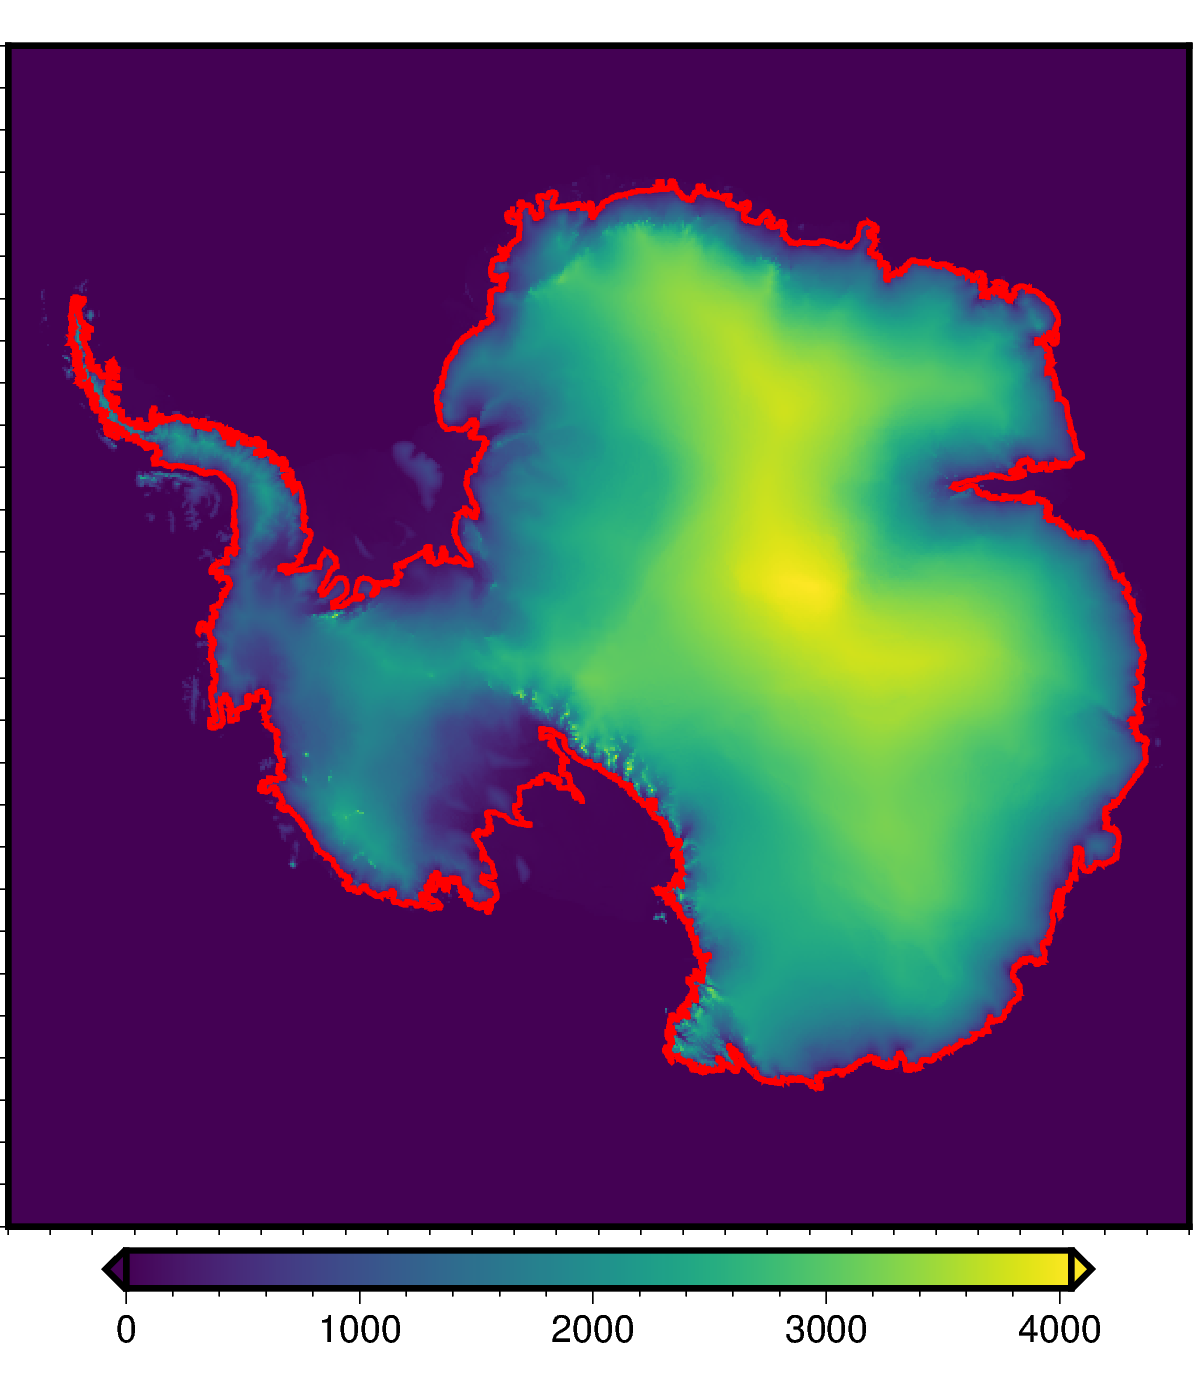

In [2]:
# fetch a grid
grid = fetch.bedmachine(layer='surface')

# fetch a shapefile
shape = fetch.groundingline()

# get just the grounding line
gdf = pyogrio.read_dataframe(shape)
groundingline = gdf[gdf.Id_text == "Grounded ice or land"]

# plot the grid
fig = maps.plot_grd(grid)

# plot the shapefile
fig.plot(groundingline, pen='1p,red')

# show the plot
fig.show()

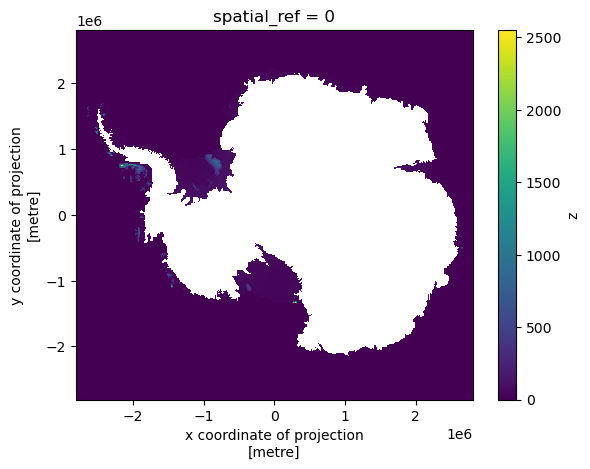

In [3]:
# mask the inside region
masked_inside = utils.mask_from_shp(
    shapefile=groundingline, xr_grid=grid, masked=True)

masked_inside.plot()


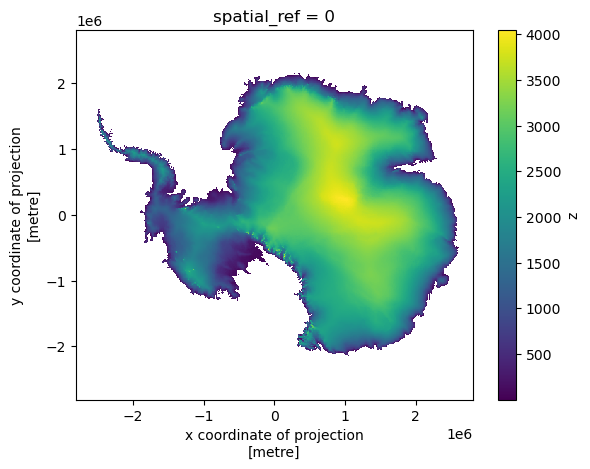

In [4]:
# mask the outside region
masked_outside = utils.mask_from_shp(
    shapefile=groundingline, xr_grid=grid, masked=True, invert=False)

masked_outside.plot()